In [51]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix,recall_score,precision_score
from matplotlib.legend_handler import HandlerLine2D

In [34]:
X_train=pd.read_csv('D:/Desktop/Flex 3/Grad Case Study/Data/capfloor/recency/X_train.txt',sep=",")
y_train=pd.read_csv('D:/Desktop/Flex 3/Grad Case Study/Data/capfloor/recency/y_train.txt',sep=",")

y_train=y_train[['target']].to_numpy()

In [54]:
X_test.shape

(750949, 34)

In [12]:
# First create the base model to tune
rf = RandomForestClassifier(random_state=100)

# check run time of the code
import datetime
start_time=datetime.datetime.now()
print(start_time)

rf_model0=rf.fit(X_train,np.ravel(y_train))
print(rf_model0)


end_time=datetime.datetime.now()

diff = end_time - start_time

days, seconds = diff.days, diff.seconds
hours = days * 24 + seconds // 3600
minutes = (seconds % 3600) // 60
seconds = seconds % 60

print("Time between dates: %d hours, %d minutes and %d seconds" % (hours, minutes, seconds))

2020-04-14 03:21:06.979876
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)
Time between dates: 0 hours, 0 minutes and 0 seconds


In [14]:
#y_pred_model0=rf_model0.predict(X_val)
y_pred_model0= [1 if i > 0.05 else 0 for i in rf_model0.predict_proba(X_val)[:,1]]

print ('Validation Accuracy is ', accuracy_score(y_val,y_pred_model0))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val,y_pred_model0)
rf_model0_auc = auc(false_positive_rate, true_positive_rate)
print('Validation AUC is ', rf_model0_auc)

rf_model0_recall=recall_score(y_val,y_pred_model0)
#Get recall score
print('Validation Recall is ', rf_model0_recall)

print(confusion_matrix(y_val,y_pred_model0))
################################################################################################
##  Test metrics
y_test_pred_model0= [1 if i > 0.05 else 0 for i in rf_model0.predict_proba(X_test)[:,1]]

print ('Test Accuracy is ', accuracy_score(y_test,y_test_pred_model0))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_test_pred_model0)
rf_model0_auc = auc(false_positive_rate, true_positive_rate)
print('Test AUC is ', rf_model0_auc)

rf_model0_recall=recall_score(y_test,y_test_pred_model0)
#Get recall score
print('Test Recall is ', rf_model0_recall)

print(confusion_matrix(y_test,y_test_pred_model0))

Validation Accuracy is  0.776864173885605
Validation AUC is  0.754249847709649
Validation Recall is  0.7292549503043377
[[202267  57301]
 [  3514   9465]]
Test Accuracy is  0.7508805524742692
Test AUC is  0.7630245372446403
Test Recall is  0.7754645175733155
[[556945 185070]
 [  2006   6928]]


#### Random Search

In [ ]:
y_train=pd.read_csv('D:/Desktop/Flex 3/Grad Case Study/Data/capfloor/recency/y_train.txt',sep=",")
y_train=y_train[['target']].to_numpy()
print(type(y_train))

y_val=pd.read_csv('D:/Desktop/Flex 3/Grad Case Study/Data/capfloor/recency/y_val_1.txt',sep=",")
y_val=y_val[['target']].to_numpy()
print(type(y_val))

test=pd.read_csv('D:/Desktop/Flex 3/Grad Case Study/Data/test data/X_y_test.txt',sep=",")
y_test=test[['target']].to_numpy()
print(type(y_test))

In [5]:
from sklearn.model_selection import RandomizedSearchCV
import pprint

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log']

n_estimators = [100, 300, 500, 800, 1200]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 16)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,20,25]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8,10,12,15,18,20]
# Method of selecting samples for training each tree
min_impurity_decrease= np.linspace(0.1, 1.0, 10, endpoint=True)
ccp_alpha=[0.001,0.0015,0.002,0.01,0.013,0.018,0]
# Create the random grid
random_grid = {#'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
#               'min_impurity_decrease': min_impurity_decrease,
               'ccp_alpha':ccp_alpha,
               'n_estimators':n_estimators
               }

print(random_grid)

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, None], 'min_samples_split': [2, 5, 10, 15, 20, 25], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 15, 18, 20], 'ccp_alpha': [0.001, 0.0015, 0.002, 0.01, 0.013, 0.018, 0], 'n_estimators': [100, 300, 500, 800, 1200]}


In [6]:
# check run time of the code
import datetime
start_time=datetime.datetime.now()
print(start_time)

# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf_rand = RandomForestClassifier(random_state=100)
# Random search of parameters, using 3 fold cross validation, 
# search across 300 (100*3) different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_rand, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=100, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, np.ravel(y_train))
print(rf_random.best_params_)


end_time=datetime.datetime.now()

diff = end_time - start_time

days, seconds = diff.days, diff.seconds
hours = days * 24 + seconds // 3600
minutes = (seconds % 3600) // 60
seconds = seconds % 60

print("Time between dates: %d hours, %d minutes and %d seconds" % (hours, minutes, seconds))

2020-04-14 02:22:32.637541
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 48.1min finished


{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 18, 'ccp_alpha': 0}
Time between dates: 0 hours, 48 minutes and 26 seconds


In [7]:
rf_rand=RandomForestClassifier(random_state=100,
n_estimators=100,
min_samples_split=5,
min_samples_leaf=4,
max_depth=18,
#min_impurity_decrease=0.6,
#max_features='sqrt',
ccp_alpha=0)

model_rf_rand=rf_rand.fit(X_train,np.ravel(y_train))

In [8]:
y_pred_model0= [1 if i > 0.05 else 0 for i in rf_rand.predict_proba(X_val)[:,1]]

#############################################
print ('Validation Accuracy is ', accuracy_score(y_val,y_pred_model0))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val,y_pred_model0)
rf_model0_auc = auc(false_positive_rate, true_positive_rate)
print('Validation AUC is ', rf_model0_auc)

rf_model0_recall=recall_score(y_val,y_pred_model0)
#Get recall score
print('Validation Recall is ', rf_model0_recall)

print(confusion_matrix(y_val,y_pred_model0))
################################################################################################
##  Test metrics
y_test_pred_model0= [1 if i > 0.05 else 0 for i in rf_rand.predict_proba(X_test)[:,1]]

print ('Test Accuracy is ', accuracy_score(y_test,y_test_pred_model0))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_test_pred_model0)
rf_model0_auc = auc(false_positive_rate, true_positive_rate)
print('Test AUC is ', rf_model0_auc)

rf_model0_recall=recall_score(y_test,y_test_pred_model0)
#Get recall score
print('Test Recall is ', rf_model0_recall)

print(confusion_matrix(y_test,y_test_pred_model0))

Validation Accuracy is  0.7930265238656085
Validation AUC is  0.7686638937777035
Validation Recall is  0.7417366515139842
[[206510  53058]
 [  3352   9627]]
Test Accuracy is  0.777528167691814
Test AUC is  0.778112237824159
Test Recall is  0.7787105439892545
[[576927 165088]
 [  1977   6957]]


In [57]:
test=pd.read_csv('D:/Desktop/Flex 3/Grad Case Study/Data/test data/X_y_test.txt',sep=",")
y_test=test[['target']]
X_test=test.drop('target',1)


In [62]:
test.columns

Index(['ACH_IN_MTD_AMT', 'ACH_IN_MTD_QTY', 'ACH_OUT_MTD_AMT',
       'ACH_OUT_MTD_QTY', 'CHK_WRITTEN_MTD_QTY', 'DEBIT_CARD_MTD_AMT',
       'DEBIT_CARD_MTD_QTY', 'MOBILE_STD_DEP_QTY', '%diff_ACH_IN',
       'diff_ACH_IN_QTY', '%diff_ACH_OUT', '%diff_CHECK_WRITTEN',
       'diff_CHECK_WRITTEN', '%diff_DEBIT_CARD', 'diff_DEBIT_CARD_QTY',
       'CHK_WRITTEN_per_trans', 'inactive_months', 'CONS_LOAN_BAL_AMT',
       'CONS_LOAN_WAR_PCT', 'CONS_DEPOSIT_ACCT_QTY', 'CONS_DEPOSIT_BAL_AMT',
       'MORTGAGE_BAL_AMT', 'SAVINGS_BAL_AMT', 'CHECKING_BAL_AMT',
       'CREDIT_CARD_BAL_AMT', 'LAST_DIRECT_DEPOSIT_AMT', 'target',
       'AVG_MONTHLY_BAL_AMT', 'LAST_STMT_BAL_AMT', '%diff_AVG_MONTHLY_BAL',
       '%diff_LAST_STMT_BAL', 'recency', 'ACTIVE_CHK_IND_Y',
       'DIRECT_DEP_IND_Y', 'HABITUAL_OD_IND_Y'],
      dtype='object')

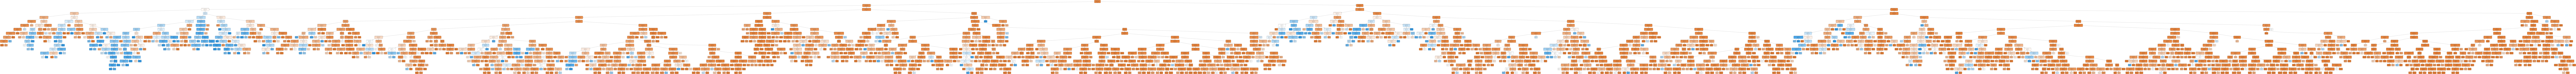

In [65]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(rf_rand.estimators_[5], out_file='tree.dot', 
               feature_names = ['ACH_IN_MTD_AMT', 'ACH_IN_MTD_QTY', 'ACH_OUT_MTD_AMT',
       'ACH_OUT_MTD_QTY', 'CHK_WRITTEN_MTD_QTY', 'DEBIT_CARD_MTD_AMT',
       'DEBIT_CARD_MTD_QTY', 'MOBILE_STD_DEP_QTY', '%diff_ACH_IN',
       'diff_ACH_IN_QTY', '%diff_ACH_OUT', '%diff_CHECK_WRITTEN',
       'diff_CHECK_WRITTEN', '%diff_DEBIT_CARD', 'diff_DEBIT_CARD_QTY',
       'CHK_WRITTEN_per_trans', 'inactive_months', 'CONS_LOAN_BAL_AMT',
       'CONS_LOAN_WAR_PCT', 'CONS_DEPOSIT_ACCT_QTY', 'CONS_DEPOSIT_BAL_AMT',
       'MORTGAGE_BAL_AMT', 'SAVINGS_BAL_AMT', 'CHECKING_BAL_AMT',
       'CREDIT_CARD_BAL_AMT', 'LAST_DIRECT_DEPOSIT_AMT',
       'AVG_MONTHLY_BAL_AMT', 'LAST_STMT_BAL_AMT', '%diff_AVG_MONTHLY_BAL',
       '%diff_LAST_STMT_BAL', 'recency', 'ACTIVE_CHK_IND_Y',
       'DIRECT_DEP_IND_Y', 'HABITUAL_OD_IND_Y'],
                class_names = 'target',
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

#### Individual hyperparameter tuning

In [36]:
X_train=pd.read_csv('D:/Desktop/Flex 3/Grad Case Study/Data/capfloor/recency/X_train.txt',sep=",")
y_train=pd.read_csv('D:/Desktop/Flex 3/Grad Case Study/Data/capfloor/recency/y_train.txt',sep=",")

In [48]:
X_val=pd.read_csv('D:/Desktop/Flex 3/Grad Case Study/Data/capfloor/recency/X_val_1.txt',sep=",")
y_val=pd.read_csv('D:/Desktop/Flex 3/Grad Case Study/Data/capfloor/recency/y_val_1.txt',sep=",")
y_val=y_val[['target']].to_numpy()
print(type(y_val))

test=pd.read_csv('D:/Desktop/Flex 3/Grad Case Study/Data/test data/X_y_test.txt',sep=",")
X_test=test[['ACH_IN_MTD_AMT', 'ACH_IN_MTD_QTY', 'ACH_OUT_MTD_AMT', 'ACH_OUT_MTD_QTY', 'CHK_WRITTEN_MTD_QTY', 'DEBIT_CARD_MTD_AMT', 'DEBIT_CARD_MTD_QTY', 'MOBILE_STD_DEP_QTY', '%diff_ACH_IN', 'diff_ACH_IN_QTY', '%diff_ACH_OUT', '%diff_CHECK_WRITTEN', 'diff_CHECK_WRITTEN', '%diff_DEBIT_CARD', 'diff_DEBIT_CARD_QTY', 'CHK_WRITTEN_per_trans', 'inactive_months', 'CONS_LOAN_BAL_AMT', 'CONS_LOAN_WAR_PCT', 'CONS_DEPOSIT_ACCT_QTY', 'CONS_DEPOSIT_BAL_AMT', 'MORTGAGE_BAL_AMT', 'SAVINGS_BAL_AMT', 'CHECKING_BAL_AMT', 'CREDIT_CARD_BAL_AMT', 'LAST_DIRECT_DEPOSIT_AMT', 'AVG_MONTHLY_BAL_AMT', 'LAST_STMT_BAL_AMT', '%diff_AVG_MONTHLY_BAL', '%diff_LAST_STMT_BAL', 'recency', 'DIRECT_DEP_IND_Y', 'ACTIVE_CHK_IND_Y', 'HABITUAL_OD_IND_Y']]
y_test=test[['target']].to_numpy()
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
